## Training

Use lightgbm model only. Play with different data preprocesses of pycaret

In [1]:
import os
os.chdir("..")
!pwd

/c/TungGpu/ml-it/code/sagemaker-r2


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from collections import Counter
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek, SMOTEENN

## Load data

In [3]:
DATA_DIR = Path("./data")
TMP_DIR = Path("./tmp")
DATA_CSV = DATA_DIR / "full/train.csv"

In [4]:
df = pd.read_csv(DATA_CSV)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,-0.732,1.14251,3,0.003423,-0.262,33831,-0.120,-0.109,0.694307,0.997923,88.184721,74.7715,0.787,21,-0.005000,-0.00457,0.801131,-0.143,-0.055,-0.005,-0.117,0.003361,0.66388,-0.005,-0.054,3170.06,-0.784,-0.060,-0.686,-0.435,-3.350108,0.889,96.3255,-0.564,-0.469,-0.028,-0.133,-21.4902,106.7920,1.49544,704.956,0.351,-0.024,-0.098,0.178543,9.62,515.012,-0.146,5490.13,-0.028,105.2190,0.995525,-0.00204,-1.604,0,0.005325,67226.0,0.00372,-0.089,3.42085,0.001932,0.181023,1.968,-212.318,0.00397,0.500892,-0.00280,0.00466,-1.904041,5190.98,0.001948,-0.426,-0.10300,1.19102,-0.032,0.927649,-0.024,21.4711,0.00368,0.004564,3138.67,0.01959,21,0.482589,-0.307,0,-0.12259,3.09698,-0.360732,0.005135,0.179927,1.49193,-0.012,3.10686,-0.00579,-0.18553,-0.122263,-0.12373,189.092,2052.68,-0.548,3.49045,-232.8,6,-0.021,-0.089,0.01107,-0.058,1.16655,21.4029,1.08095,0.010073,1.837,0.255,0.385121,6913.68,1.19125,1132,1.09259,0.204294,0.001265,-1.148,0.070,-0.035,1.08133,-0.031,-0.008000,-0.458764,0.481826,-0.062,66676.1,-0.658,764.3,-0.005,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,-0.715,1.80633,3,0.004003,-0.292,13436,-0.284,-0.102,1.816916,1.001320,133.148294,73.0013,0.223,82,0.000652,-0.01296,0.801101,-0.090,-0.023,-0.228,-0.107,0.004248,0.64013,-0.560,-0.055,3799.00,-0.840,-0.063,-0.846,-0.335,0.009949,0.211,93.2053,-0.445,-0.481,-0.354,-0.105,-18.5995,73.7407,1.49699,966.937,-0.623,-0.042,-0.110,0.180113,4.34,482.997,3.234,6243.08,-0.025,73.1009,0.994811,-0.00224,0.552,0,0.004956,67841.0,0.00771,0.170,3.48121,-0.003156,0.181066,-0.312,-171.503,0.00505,0.225318,-0.00148,-0.00308,2.465348,5759.22,-0.009400,-0.258,-0.11513,1.18592,-0.507,1.828688,-0.023,21.3636,-0.00712,0.000381,3536.88,-0.00634,82,0.482602,-0.272,0,-0.12232,3.09066,-0.080839,-0.002860,0.200937,1.50898,-0.029,3.10072,0.00746,-0.18674,-0.125014,-0.12270,216.287,2349.23,-0.476,3.49726,11.5,2,-0.045,-0.054,-0.00694,-0.073,1.15355,21.3422,1.08186,0.000000,-0.169,-1.168,-0.128346,6995.61,1.21638,3264,1.09616,0.200889,0.002094,0.733,0.216,-0.040,1.08129,-0.061,-0.004825,0.154446,0.482792,-0.347,66715.4,-0.839,532.5,-0.023,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,0.456,1.19857,4,0.005529,-0.316,26894,-0.148,-0.101,-0.514663,0.997676,127.044605,74.6132,0.901,73,-0.002503,-0.00687,0.795001,-0.188,-0.093,-0.035,-0.150,0.004253,0.67838,-0.035,-0.082,3061.70,0.291,-0.065,-0.204,-0.488,-2.275190,0.801,95.0316,1.272,2.453,-0.065,-0.184,-17.8527,93.0292,1.50489,683.744,0.031,-0.049,-0.078,0.179013,-74.76,448.331,-0.302,5367.35,-0.029,91.8613,0.996249,-0.00391,0.641,0,0.003050,66807.2,0.00773,0.375,3.47297,-0.000141,0.180348,-0.391,-164.190,-0.00670,-2.152940,-0.00391,-0.00756,-3.097850,5160.00,-0.009642,-0.387,-0.10152,1.20644,0.965,0.050663,-0.046,21.5870,0.00353,0.005148,2942.89,-0.02731,73,0.480137,-0.379,1,-0.12413,3.10466,-0.686895,0.008008,0.194851,1.49082,-0.041,3.08993,0.00883,-0.18328,-0.122755,-0.12451,184.724,2031.26,1.580,3.45300,-110.0,3,-0.057,-0.067,-0.00227,-0.154,1.16579,21.5364,1.08200,-0.006764,-0.190,-0.483,0.068413,6634.91,1.18248,2654,1.09632,0.197141,-0.002956,0.478,-0.074,-0.035,1.08181,-0.051,0.012258,-0.446567,0.480328,-0.044,66147.2,1.090,651.4,-0.035,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0
3,-1.0827

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Columns: 152 entries, 0 to target
dtypes: float64(143), int64(9)
memory usage: 11.9 MB


## Split data

In [6]:
random_seed = 17

In [7]:
Counter(df['target'])

Counter({0: 10000, 4: 29, 3: 52, 1: 101, 2: 59})

## Simple predictor: Return majority label

In [8]:
def simple_pred(x):
    return np.zeros(x.shape[0])

In [9]:
y_pred = simple_pred(df.drop('target', axis=1))
print(classification_report(df['target'], y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10000
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        29

    accuracy                           0.98     10241
   macro avg       0.20      0.20      0.20     10241
weighted avg       0.95      0.98      0.96     10241



**NOTE**: Returning the majority class achieves 98% accuracy!

## Setup data

In [10]:
# Pycaret will split data into train, valid,
# and hold-out test set for us
rare_df = df[df['target'] != 0]
rare_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,240.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,240.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,2.896237,0.188863,0.173095,-0.027581,0.480722,0.197494,0.069344,10.317147,0.012734,485.253058,-0.021876,1.600143,10.406639,0.002964,-0.008349,30720.639004,0.034029,-0.020668,0.670769,0.999942,110.196248,73.768865,0.153216,2933.817427,0.000177,-0.000349,0.800150,-0.026710,0.013261,-0.030934,-0.063091,0.004136,0.668627,-0.001788,0.049369,3374.396598,0.013021,0.026303,0.063178,0.186340,-0.367715,0.033523,94.257518,0.295822,0.301029,-0.022407,0.031494,-37.730951,93.454921,1.500247,914.074913,-0.019203,-0.018066,0.006876,0.179764,-22.214813,511.535519,0.235237,5501.975934,-0.028701,92.615749,0.995563,-0.002553,0.160162,83.128631,0.003150,66952.43527,-0.000151,-0.126216,3.461026,0.000173,0.180250,0.074129,-213.740199,0.000669,-1.005121,-0.002614,0.000138,0.102417,5289.434689,-0.001873,-0.112606,-0.090961,1.200877,0.041929,0.229890,-0.004672,21.575083,-0.001860,0.003160,3209.696846,-0.003171,2997.887967,0.480173,0.189266,186.647303,-0.119680,3.099720,2.559629,0.002960,0.237636,1.499809,0.029145,3.099553,-0.000071,-0.190581,-0.120343,-0.119985,234.783456,2166.673320,0.203801,3.461492,-7.679253,7.373444,-0.016577,-0.018851,-0.000730,0.123324,1.159376,21.546107,1.081985,0.000166,0.109295,-0.061141,-0.130815,6847.262199,1.201011,2533.721992,1.095481,0.200070,-0.000131,0.192946,0.033415,0.275295,1.081986,-0.016282,0.000509,0.841300,0.481024,0.065315,66527.912033,0.026423,623.763071,-0.012303,0.048857,-7.025282,0.339133,-0.194543,-0.119841,0.049164,17.398949,2.037344
std,7.292555,1.259107,0.840200,1.002319,1.135420,1.170167,0.908489,1.079116,0.368060,77.195474,0.910039,0.389972,30.518311,0.003676,0.795318,8048.655426,0.681926,0.511785,1.788453,0.001467,32.847867,1.469633,1.320506,10281.733830,0.003053,0.011905,0.003005,0.651361,0.414919,0.124301,0.403680,0.004784,0.014690,0.277209,0.661628,309.6561

In [42]:
some_class0 = df[:500]
some_class0.describe()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.011848,-0.008254,-0.064298,-0.017906,0.080760,0.044358,-0.000220,10.171591,-0.033016,440.512106,...,679.145800,-0.017710,0.050038,-6.662234,-0.065610,-0.196214,-0.119738,0.050348,17.429396,0.0
std,0.959274,0.643983,0.604477,1.019938,0.900109,0.984548,0.764013,1.092165,0.231370,17.833010,...,125.332504,0.182244,0.007569,18.251680,0.973645,0.016983,0.005736,0.007918,0.312354,0.0
min,-2.658028,-0.442000,-0.407000,-2.799000,-0.517000,-0.501000,-0.506000,7.768940,-0.113000,388.303000,...,385.100000,-0.163000,0.030690,-49.510000,-1.890601,-0.224940,-0.132810,0.030346,16.659900,0.0
25%,-0.706521,-0.180000,-0.298000,-0.822000,-0.308000,-0.186250,-0.310000,9.392893,-0.059000,427.804000,...,598.550000,-0.041000,0.045348,-21.197500,-0.987904,-0.216207,-0.124360,0.045271,17.220900,0.0
50%,-0.062817,-0.113000,-0.261000,-0.062000,-0.275000,-0.118000,-0.280000,10.061250,-0.051000,439.018000,...,667.100000,-0.024000,0.049347,-4.744000,-0.091265,-0.189020,-0.119445,0.049897,17.424850,0.0
75%,0.723968,-0.084000,-0.195000,0.714000,-0.239000,-0.078000,-0.238250,10.720675,-0.045000,453.119250,...,752.525000,-0.010000,0.055026,10.737750,0.855180,-0.181660,-0.114897,0.054320,17.645650,0.0
max,2.602134,6.507000,3.011000,2.625000,4.660000,11.792000,6.856000,14.471900,3.240000,489.722000,...,1069.400000,2.124000,0.083105,20.542000,1.853839,-0.175380,-0.108120,0.109032,18.791300,0.0


In [47]:
test_set = pd.concat([some_class0, rare_df])
test_set

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,...,764.3,-0.005,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,...,532.5,-0.023,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,...,651.4,-0.035,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,...,603.4,-0.008,0.043571,-44.990,0.335563,-0.19257,-0.11309,0.045097,17.5977,0
4,0.891784,-0.219,1.757,-0.782,-0.268,-0.099,-0.239,9.42913,-0.067,429.280,...,417.4,-0.025,0.041588,-12.205,-0.728111,-0.18187,-0.12143,0.043112,17.2664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.028558,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,11.34900,-0.072,443.974,...,375.9,-0.051,0.049026,1.273,-0.533203,-0.18568,-0.11735,0.053982,17.1961,3
10237,-0.288804,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,12.03610,-0.072,450.603,...,389.9,-0.051,0.054744,-29.510,-0.725361,-0.21962,-0.11697,0.059700,16.9488,3
10238,0.073675,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,10.44560,-0.072,427.511,...,625.4,-0.051,0.046761,13.455,-1.775220,-0.18374,-0.11664,0.045234,16.9493,1
10239,-0.053419,-0.191,1.505,1.110,2.209,-0.062,-0.349,10.91210,-0.125,424.143,...,865.1,-0.015,0.054070,-15.422,1.265340,-0.18110,-0.12317,0.052165,16.9989,1


In [52]:
test_set.to_csv(DATA_DIR / "test.csv")

## Exp 01: Play with pycaret data preprocesses

- USE MINORITY-CLASS RECORDS TO EVALUATE MODEL
- Enable stratified data split
- Stratified k-fold training
- Fill NaN by using feature's mean
- Fix class imbalance by using SMOTETomek
- Normalize features by using zscore
- No outlier removal to prevent feature loss
- No use of feature engineering techniques: a*b, polynomial, trigonometry (due to limited time)
- Enable feature selection by using some tree models to select
- Remove multicollinearity (highly correlated features)
- Enable PCA (reduce feature space dimension)

In [11]:
exp_baseline = setup(
    data=df,
    train_size=0.8, # split training and hold-out test set
    target='target',
    session_id=random_seed,
    use_gpu=True,
    
    data_split_shuffle=True,
    data_split_stratify=True,
    fold_strategy="stratifiedkfold",
    fold=5,
            
    imputation_type='simple', # there's a small number of missing values
    numeric_imputation='mean', # use mean to replace missing values
    
    fix_imbalance=True,
    fix_imbalance_method=SMOTETomek(), # imblearn's method
    
    remove_outliers=False,
    outliers_threshold=0.05, # percentage of outliers in distribution's tail
            
    normalize=True,
    normalize_method='zscore', # z=(x-u)/s
    transformation=False,
    transformation_method="yeo-johnson",
            
    feature_interaction=False, # create a*b features
    feature_ratio=False, # create a/b features
    interaction_threshold=0.01, # threshold feature importance
            
    polynomial_features=False,
    polynomial_degree=2,
    polynomial_threshold=0.1,
            
    trigonometry_features=False, # create tan(x), sin(x), cos(x)
    
    feature_selection=True, # use tree models to compute feature importance
    feature_selection_threshold=0.8,
    
    remove_multicollinearity=True, # drop highly correlated features
    multicollinearity_threshold=0.9,
            
    pca=True, # reduce feature space dimension
    pca_method="linear",
    pca_components=0.99, # % components to keep
    
    log_experiment="mlflow",
    log_plots=True,
)

,Description,Value
0,session_id,17
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(10241, 152)"
5,Missing Values,True
6,Numeric Features,150
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
model1 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9811,0.9087,0.4298,0.9655,0.9731,0.3879,0.4591
1,0.9811,0.8962,0.3724,0.9741,0.9734,0.3634,0.4527
2,0.9817,0.9039,0.4123,0.9687,0.9742,0.3957,0.4648
3,0.9835,0.8492,0.4552,0.9770,0.9777,0.4665,0.5368
4,0.9823,0.8432,0.5032,0.9781,0.9760,0.4681,0.5170
Mean,0.9819,0.8802,0.4345,0.9727,0.9749,0.4163,0.4861
Std,0.0009,0.0281,0.0436,0.0048,0.0017,0.0430,0.0341


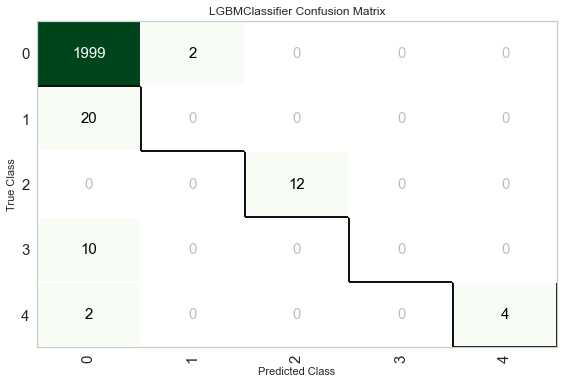

In [13]:
# plot confusion matrix
plot_model(model1, plot='confusion_matrix')

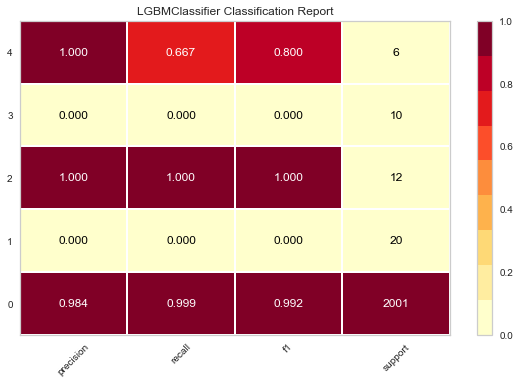

In [14]:
# plot classification report
plot_model(model1, plot = 'class_report')

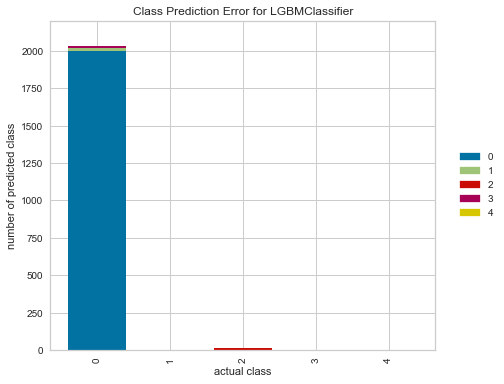

In [15]:
# prediction error plot
plot_model(model1, plot='error')

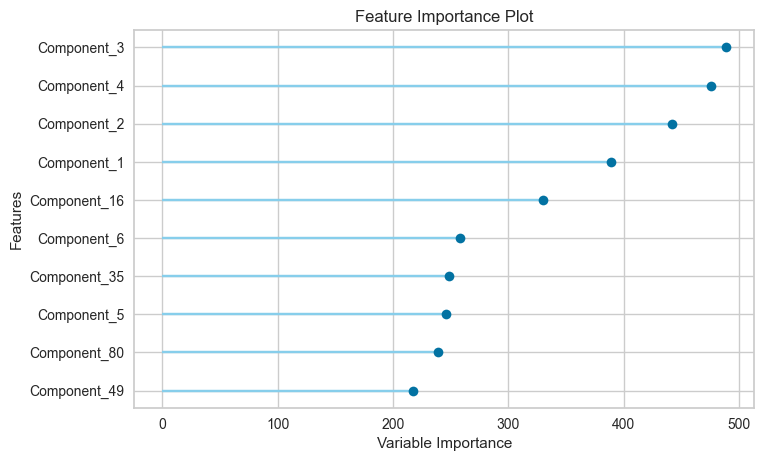

In [17]:
plot_model(model1, plot = 'feature')

## Fine tune model

Use Random Grid Search to tune the hyper-parameters automatically. This takes a lot of time. I'll skip this step.

In [18]:
# tuned_et = tune_model(model1)

## Predict on test set

In [19]:
predict_model(model1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9834,0.8718,0.5331,0.9700,0.9765,0.4807,0.5413


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_125,Component_126,Component_127,Component_128,Component_129,Component_130,Component_131,target,Label,Score
0,1.555895,0.844401,-1.656263,1.335095,0.734973,1.687500,-1.650980,2.652503,-3.107503,-1.475750,...,0.129801,0.404478,0.420549,-0.127147,0.711169,-0.927406,0.012643,0,0,1.0000
1,2.198228,-2.717044,2.650806,-1.637699,-0.511405,-1.340959,-2.455754,0.320487,0.657177,1.134966,...,-0.546987,0.219187,-0.023893,-0.412384,-0.486680,0.090100,0.553497,0,0,1.0000
2,0.690282,-2.469329,3.374588,1.605291,3.434678,-0.746788,-1.114130,-2.489548,-0.567330,0.864794,...,-0.016200,0.234843,-0.441719,-0.575080,-0.519340,-0.214647,-0.087054,0,0,1.0000
3,4.624753,3.368456,1.055701,-1.229657,1.681350,0.820895,1.330587,-3.208401,-1.220820,-1.761166,...,1.037518,-0.146594,-0.061378,-0.371612,0.554662,-0.095561,-0.093209,0,0,0.9996
4,0.912058,-0.621081,-3.438839,2.792016,0.369276,-0.443441,-0.319306,-1.184063,1.809821,-1.045554,...,-0.314269,0.449235,-0.533312,0.552167,-0.137289,-0.751084,0.708372,0,0,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,-2.976920,1.013968,0.484296,-0.719961,-3.374573,-0.705588,0.821115,0.640426,-0.378200,2.048959,...,-0.995331,-0.168242,-0.763222,-0.398990,0.616146,0.346233,0.036582,0,0,0.9997
2045,-0.823896,3.138514,2.156707,-0.690667,0.710675,-3.387230,1.232039,-1.720073,-2.700526,0.249281,...,-0.144106,0.508933,0.640432,0.032264,0.568480,0.425113,0.348592,0,0,0.9998
2046,-4.905920,0.279503,-1.440625,-0.967255,-0.793225,-0.378548,0.362637,1.463534,0.461723,2.196905,...,-0.725565,-0.260613,0.351962,0.556755,-0.606702,0.050759,-0.091368,0,0,0.9999
2047,2.368078,0.326000,-3.229228,2.232781,1.162071,0.414007,-0.718470,0.847124,-1.257798,0.211033,...,0.308867,-0.338461,-0.725486,0.492768,0.312918,0.137412,-0.118373,0,0,0.9999


In [20]:
predict_model(model1, data=rare_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8672,0,0.7081,1.0000,0.9267,0.8225,0.8380


,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,target,Label,Score
10000,13.787876,-0.060,1.623,1.464,-0.218,-0.116,1.513,10.63180,-0.041,493.433,...,0.048177,11.702,0.382594,-0.18044,-0.12885,0.048559,17.3021,4,4,0.9999
10001,0.869013,-0.060,-0.259,0.828,-0.218,-0.116,-0.286,10.52980,-0.041,424.406,...,0.047140,-4.125,-1.102119,-0.17566,-0.11187,0.048665,17.2747,3,3,0.9998
10002,-0.625999,-0.060,-0.259,0.279,2.399,-0.116,-0.286,10.35190,-0.041,464.103,...,0.049809,12.051,-0.464432,-0.18519,-0.10996,0.049619,17.2118,3,3,0.9996
10003,-0.423907,-0.060,-0.259,0.279,-0.218,-0.116,-0.286,10.14790,-0.041,422.223,...,0.054309,11.649,0.300349,-0.17857,-0.10872,0.059457,16.9779,3,3,0.9993
10004,-0.290398,-0.060,-0.259,1.808,-0.218,-0.116,-0.286,9.83442,-0.041,430.728,...,0.047634,-36.310,0.655448,-0.17857,-0.12625,0.054118,17.3207,3,3,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.028558,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,11.34900,-0.072,443.974,...,0.049026,1.273,-0.533203,-0.18568,-0.11735,0.053982,17.1961,3,3,0.9999
10237,-0.288804,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,12.03610,-0.072,450.603,...,0.054744,-29.510,-0.725361,-0.21962,-0.11697,0.059700,16.9488,3,0,0.9996
10238,0.073675,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,10.44560,-0.072,427.511,...,0.046761,13.455,-1.775220,-0.18374,-0.11664,0.045234,16.9493,1,1,0.9981
10239,-0.053419,-0.191,1.505,1.110,2.209,-0.062,-0.349,10.91210,-0.125,424.143,...,0.054070,-15.422,1.265340,-0.18110,-0.12317,0.052165,16.9989,1,1,0.9994


## Finalize model for deployment

This step trains the model on the entire dataset including the test set.

In [21]:
final_model = finalize_model(model1)

## Save the model

In [53]:
output = save_model(final_model, 'ml_model/final-model')

Transformation Pipeline and Model Successfully Saved


## Validate model

In [54]:
saved_model = load_model('ml_model/final-model')

Transformation Pipeline and Model Successfully Loaded


In [48]:
pred_df = predict_model(saved_model, data=test_set)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [49]:
pred_df

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,target,Label,Score
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,...,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0,0,0.9999
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,...,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0,0,0.9970
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,...,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0,0,0.9993
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,...,0.043571,-44.990,0.335563,-0.19257,-0.11309,0.045097,17.5977,0,0,0.9980
4,0.891784,-0.219,1.757,-0.782,-0.268,-0.099,-0.239,9.42913,-0.067,429.280,...,0.041588,-12.205,-0.728111,-0.18187,-0.12143,0.043112,17.2664,0,0,0.9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.028558,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,11.34900,-0.072,443.974,...,0.049026,1.273,-0.533203,-0.18568,-0.11735,0.053982,17.1961,3,3,0.9999
10237,-0.288804,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,12.03610,-0.072,450.603,...,0.054744,-29.510,-0.725361,-0.21962,-0.11697,0.059700,16.9488,3,3,0.9988
10238,0.073675,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,10.44560,-0.072,427.511,...,0.046761,13.455,-1.775220,-0.18374,-0.11664,0.045234,16.9493,1,1,0.9933
10239,-0.053419,-0.191,1.505,1.110,2.209,-0.062,-0.349,10.91210,-0.125,424.143,...,0.054070,-15.422,1.265340,-0.18110,-0.12317,0.052165,16.9989,1,1,0.9977


In [56]:
ft_only_df = test_set.drop('target', axis=1)
pred_df = predict_model(saved_model, data=ft_only_df)
pred_df

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,Label,Score
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,...,-0.005,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0,0.9999
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,...,-0.023,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0,0.9970
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,...,-0.035,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0,0.9993
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,...,-0.008,0.043571,-44.990,0.335563,-0.19257,-0.11309,0.045097,17.5977,0,0.9980
4,0.891784,-0.219,1.757,-0.782,-0.268,-0.099,-0.239,9.42913,-0.067,429.280,...,-0.025,0.041588,-12.205,-0.728111,-0.18187,-0.12143,0.043112,17.2664,0,0.9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.028558,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,11.34900,-0.072,443.974,...,-0.051,0.049026,1.273,-0.533203,-0.18568,-0.11735,0.053982,17.1961,3,0.9999
10237,-0.288804,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,12.03610,-0.072,450.603,...,-0.051,0.054744,-29.510,-0.725361,-0.21962,-0.11697,0.059700,16.9488,3,0.9988
10238,0.073675,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,10.44560,-0.072,427.511,...,-0.051,0.046761,13.455,-1.775220,-0.18374,-0.11664,0.045234,16.9493,1,0.9933
10239,-0.053419,-0.191,1.505,1.110,2.209,-0.062,-0.349,10.91210,-0.125,424.143,...,-0.015,0.054070,-15.422,1.265340,-0.18110,-0.12317,0.052165,16.9989,1,0.9977


## Test evaluation

In [50]:
from sklearn.metrics import accuracy_score, f1_score

In [51]:
y_test = pred_df['target']
y_pred = pred_df['Label']
print(f1_score(y_test, y_pred, average="macro"))
print(accuracy_score(y_test, y_pred))

1.0
1.0
